In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import os

df = pd.read_csv (r'./dataset/concatenated.csv')
print (df)


       Unnamed: 0       ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0               0  5008804            1             1                1   
1               1  5008805            1             1                1   
2               2  5008806            1             1                1   
3               3  5008808            0             0                1   
4               4  5008809            0             0                1   
...           ...      ...          ...           ...              ...   
36448       36448  5149828            1             1                1   
36449       36449  5149834            0             0                1   
36450       36450  5149838            0             0                1   
36451       36451  5150049            0             0                1   
36452       36452  5150337            1             0                1   

       AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0              427500.0                 4    

TypeError: argument of type 'method' is not iterable

In [39]:
df.describe(include='all')

Unnamed: 0            ID   CODE_GENDER  FLAG_OWN_CAR  \
count  36453.000000  3.645300e+04  36453.000000  36453.000000   
mean   18226.000000  5.078228e+06      0.329849      0.379667   
std    10523.219018  4.187702e+04      0.470165      0.485311   
min        0.000000  5.008804e+06      0.000000      0.000000   
25%     9113.000000  5.042027e+06      0.000000      0.000000   
50%    18226.000000  5.074615e+06      0.000000      0.000000   
75%    27339.000000  5.115397e+06      1.000000      1.000000   
max    36452.000000  5.150487e+06      1.000000      1.000000   

       FLAG_OWN_REALTY  AMT_INCOME_TOTAL  NAME_INCOME_TYPE  \
count     36453.000000      3.645300e+04      36453.000000   
mean          0.672153      1.866846e+05          2.398019   
std           0.469435      1.017935e+05          1.734046   
min           0.000000      2.700000e+04          0.000000   
25%           0.000000      1.215000e+05          1.000000   
50%           1.000000      1.575000e+05          4.000000   
75%           1.000000      2.250000e+05          4.000000   
max           1.000000      1.575000e+06          4.000000   

       NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
count         36453.000000        36453.000000       36453.000000   
mean              3.097084            1.367789           1.282912   
std               1.341332            0.954554           0.951722   
min               0.000000            0.000000           0.000000   
25%               1.000000            1.000000           1.000000   
50%               4.000000            1.000000           1.000000   
75%               4.000000            1.000000           1.000000   
max               4.000000            4.000000           5.000000   

       FLAG_WORK_PHONE    FLAG_PHONE    FLAG_EMAIL  OCCUPATION_TYPE  \
count     36453.000000  36453.000000  36453.000000     36453.000000   
mean          0.225523      0.294818      0.089732         9.170713   
std           0.417932      0.455967      0.285801         4.292705   
min           0.000000      0.000000      0.000000         0.000000   
25%           0.000000      0.000000      0.000000         6.000000   
50%           0.000000      0.000000      0.000000        10.000000   
75%           0.000000      1.000000      0.000000        12.000000   
max           1.000000      1.000000      1.000000        18.000000   

       CNT_FAM_MEMBERS           AGE  YEARS_EMPLOYED        STATUS  \
count     36453.000000  36453.000000    36453.000000  36453.000000   
mean          2.196911     43.738508        6.024405      0.117658   
std           0.899489     11.501045        6.480411      0.322208   
min           1.000000     20.504186        0.000000      0.000000   
25%           2.000000     34.119797        1.117066      0.000000   
50%           2.000000     42.610047        4.249232      0.000000   
75%           3.000000     53.219436        8.632621      0.000000   
max           9.000000     68.863837       43.020733      1.000000   

       MONTHS_BALANCE  
count    36453.000000  
mean        26.163965  
std         16.501004  
min          0.000000  
25%         12.000000  
50%         24.000000  
75%         39.000000  
max         60.000000

In [40]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
profile.to_file("Analysis.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='STATUS', ylabel='AMT_INCOME_TOTAL'>

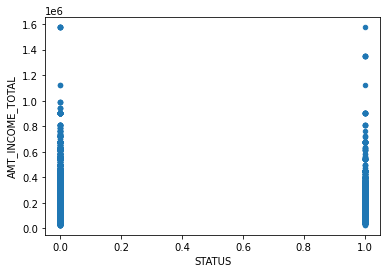

In [75]:
# in our data, status of 0 is "ACCEPT" (no late payments) and status of 1 is "DON'T ACCEPT" (late payments)
# Expecting a negative correlation, for example, between status and income (higher income-> more status 0, lower
# income -> more status 1)
# This isn't evident in this graph - maybe need to visualize it a different way, or drop more of the "accept"/status = 0 rows
# since the data is so skewed?
%matplotlib inline

df.plot.scatter('STATUS','AMT_INCOME_TOTAL')

       STATUS  AMT_INCOME_TOTAL
0           1          427500.0
1           1          427500.0
2           0          112500.0
3           0          270000.0
4           0          270000.0
...       ...               ...
36448       1          315000.0
36449       1          157500.0
36450       1          157500.0
36451       1          283500.0
36452       1          112500.0

[36453 rows x 2 columns]


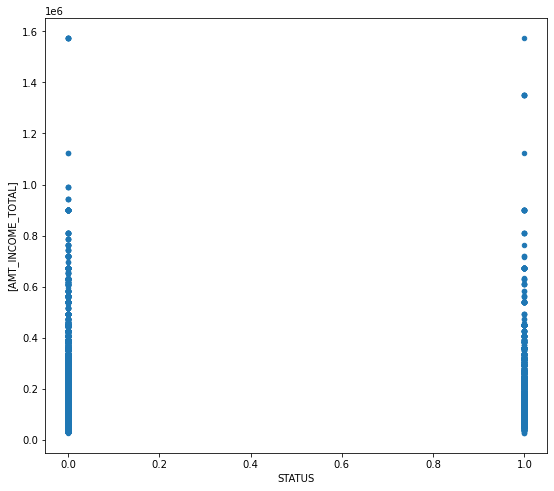

<Figure size 432x288 with 0 Axes>

In [76]:
# take data
#data = pd.read_csv("./dataset/concatenated.csv")

df1 = pd.DataFrame(data, columns=["STATUS", "AMT_INCOME_TOTAL"])
print(df1)

# plot the dataframe
df1.plot(x="STATUS", y=["AMT_INCOME_TOTAL"], kind="scatter", figsize=(9, 8))

# print graph
plt.show()

#save graph
plt.savefig("income_vs_status.png")



       STATUS  CNT_FAM_MEMBERS
2           0                2
3           0                1
4           0                1
5           0                1
6           0                1
...       ...              ...
36096       0                3
36097       0                3
36098       0                2
36099       0                2
36100       0                2

[32164 rows x 2 columns]
   CNT_FAM_MEMBERS  counts
0                1    6162
1                2   17200
2                3    5698
3                4    2683
4                5     349
5                6      53
6                7      19


Text(0, 0.5, '# of respondents')

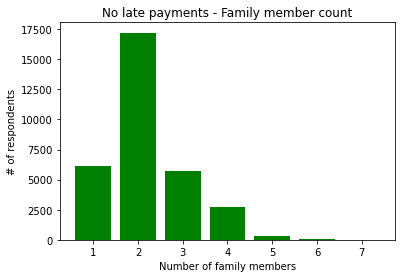

In [77]:
df2 = pd.DataFrame(data, columns=["STATUS", "CNT_FAM_MEMBERS"])
# df2 = pd.DataFrame({'STATUS': status,
                   # 'CNT_FAM_MEMBERS': CNT_FAM_MEMBERS}, index=index)
# df2=(df2[:30000])

# plot all the customers without any late payments
df_no_late_payments = df2.loc[df['STATUS'] == 0]
print(df_no_late_payments)


df_familycount_status0 = df_no_late_payments.groupby(['CNT_FAM_MEMBERS']).size().reset_index(name='counts')
print(df_familycount_status0)


X = list(df_familycount_status0.iloc[:, 0])
Y = list(df_familycount_status0.iloc[:, 1])
  
# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("No late payments - Family member count")
plt.xlabel("Number of family members")
plt.ylabel("# of respondents")

       STATUS  CNT_FAM_MEMBERS
0           1                2
1           1                2
18          1                2
19          1                2
20          1                2
...       ...              ...
36448       1                2
36449       1                2
36450       1                2
36451       1                2
36452       1                1

[4289 rows x 2 columns]
   CNT_FAM_MEMBERS  counts
0                1     825
1                2    2263
2                3     723
3                4     423
4                5      48
5                6       5
6                9       2


Text(0, 0.5, '# of respondents')

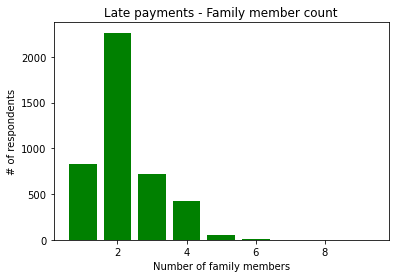

In [78]:
# expecting that late payments/"do not acccepts" will have more family members on average - doesn't look this way according to graphs
# but maybe the data is too skewed (most of data points have no late payments)

# plot all the customers WITH late payments
df_late_payments = df2.loc[df['STATUS'] == 1]
print(df_late_payments)


df_familycount_status1 = df_late_payments.groupby(['CNT_FAM_MEMBERS']).size().reset_index(name='counts')
print(df_familycount_status1)


X = list(df_familycount_status1.iloc[:, 0])
Y = list(df_familycount_status1.iloc[:, 1])
  
# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Late payments - Family member count")
plt.xlabel("Number of family members")
plt.ylabel("# of respondents")
  
